<a href="https://colab.research.google.com/github/IsaacMrSmile/Inmersion-en-DataSciencie/blob/main/Alura_%7C_Imers%C3%A3o_de_Dados_(3%C2%AA_ed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação e análise exploratória dos dados

## Importação e tratamento inicial

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #ignora as mensagens de aviso

In [ ]:
dados_url = 'https://github.com/mariacmartins/imersaodados_alura/blob/main/dados_experimentos.zip?raw=true'
df = pd.read_csv(dados_url, compression='zip')

In [ ]:
df

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

In [ ]:
df.dtypes  #verificando os tipos em cada coluna

id             object
tratamento     object
tempo           int64
dose           object
droga          object
               ...   
c-95          float64
c-96          float64
c-97          float64
c-98          float64
c-99          float64
Length: 877, dtype: object

*Não há dados numéricos no formato de string, logo não será preciso transformar string em float. *

In [ ]:
#Renomeando as colunas, eliminando '-'
colunas = df.columns.to_numpy()  #cria um array com os nomes das colunas
for i in range(0,colunas.shape[0]):
   colunas[i] = colunas[i].replace('-','')  #faz um loop percorrendo os índices do array, trocando '-' por ''
df.columns = colunas  #renomeia as colunas
df.rename(columns= {'droga':'composto'}, inplace = True) #renomeia a coluna 'droga' para 'composto'
df.tail() #mostra os 5 últimos regristos

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


## Análise exploratória

In [ ]:
df.describe()  #Estatística descritiva dos dados numéricos

,tempo,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.

**Analizando os dados de alguns campos**

In [ ]:
df['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

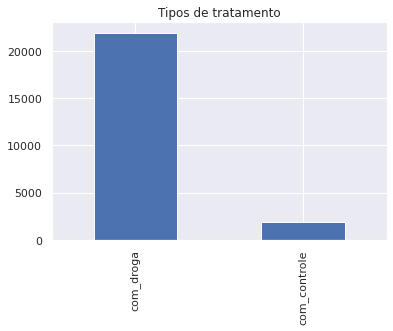

In [ ]:
df['tratamento'].value_counts().plot.bar(title = 'Tipos de tratamento')

Observamos uma quantidade significativamente maior de dados com rótulo 'com_droga'. 

In [ ]:
df['composto'][df.tratamento == 'com_controle'].value_counts()

cacb2b860    1866
Name: composto, dtype: int64

Após o código acima, constatamos que todas as amostras rotuladas 'com_controle' foram estudadas com uma única droga, cacb2b860. Isso explica a discrepância entre a quantidade 'com_droga' e 'com_controle'.  

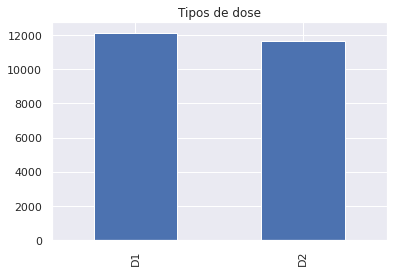

In [ ]:
df['dose'].value_counts().plot.bar(title = 'Tipos de dose')

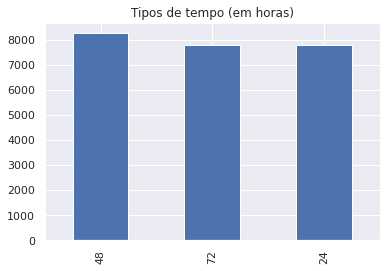

In [ ]:
df['tempo'].value_counts().plot.bar(title = 'Tipos de tempo (em horas)')

Os tipos de dose e os tempos de administração estão bem distribuídos. Os dados estão balanceados.

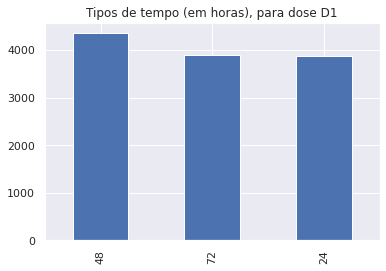

In [ ]:
df[df.dose == 'D1']['tempo'].value_counts().plot.bar(title = 'Tipos de tempo (em horas), para dose D1') 

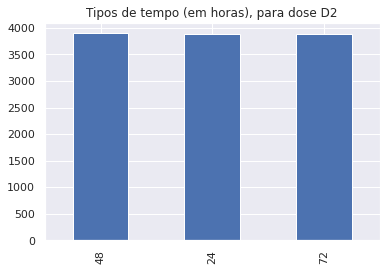

In [ ]:
df[df.dose == 'D2']['tempo'].value_counts().plot.bar(title = 'Tipos de tempo (em horas), para dose D2')

Faremos agora uma análise descritiva dos compostos. Para isso, começaremos conhecendo quais são os compostos com maior frequência. 

In [ ]:
df['composto'].value_counts()[0:15]

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
d08af5d4b     196
292ab2c28     194
d50f18348     186
d1b47f29d     178
67c879e79      19
52d1e6f43      18
83a9ea167      18
d488d031d      18
a7c2673c1      14
5d9bb0ebe      14
Name: composto, dtype: int64

Observa-se então que apenas 9 compostos tem frequência acima de 100. 

In [ ]:
cod_composto = df['composto'].value_counts().index[0:9]

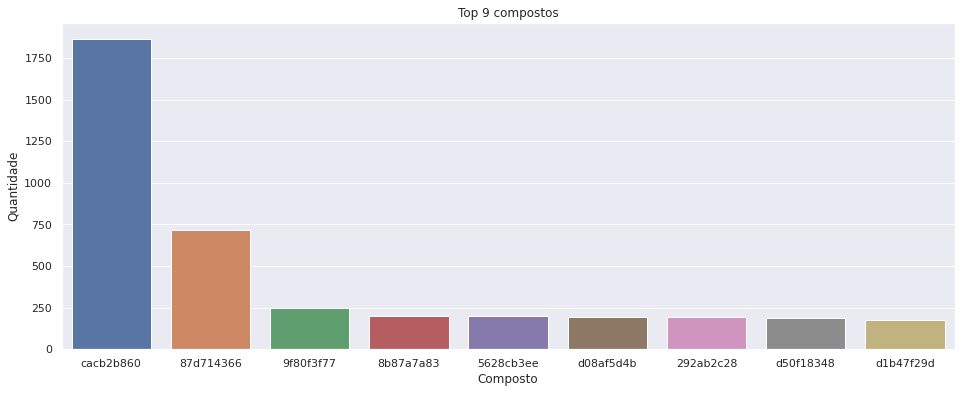

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(16, 6)) #para deixar o gráfico maior e mais legível
sns.set()
ax = sns.countplot(x = 'composto', data = df.query('composto in @cod_composto'), order = df['composto'].value_counts().index[0:9])
ax.set_title('Top 9 compostos')
ax.set(xlabel='Composto', ylabel= 'Quantidade') #muda o nome dos eixos
plt.show()

Observe que há uma grande discrepância na quantidade de compostos. O composto cacb2b860 aparece com uma quantidade muito maior. Este é exatamente o mesmo composto usando no grupo de controle. 

Vejamos agora o histograma das variáveis g0 e g1

Text(0, 0.5, 'Contagem')

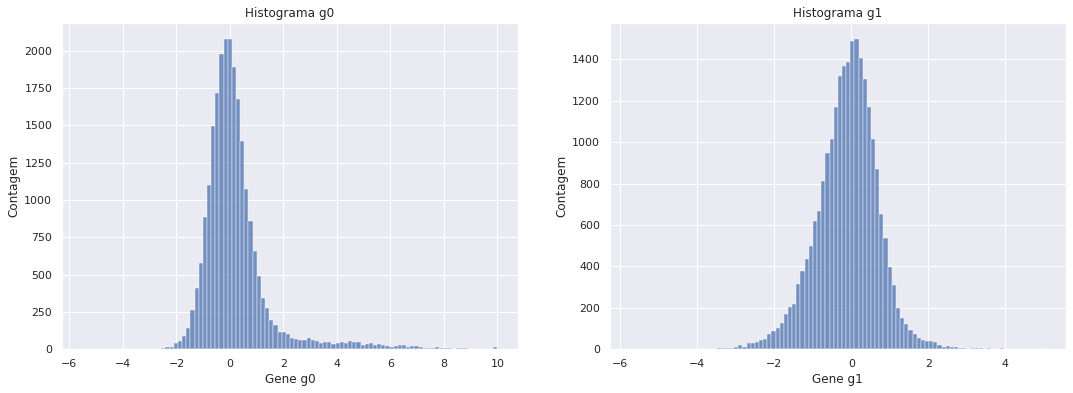

In [ ]:
figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.histplot(data = df['g0'], bins = 100, stat = 'count')
plt.title('Histograma g0')
plt.xlabel('Gene g0')
plt.ylabel('Contagem')

plt.subplot(1, 2, 2)
sns.histplot(data = df['g1'], bins = 100, stat = 'count')
plt.title('Histograma g1')
plt.xlabel('Gene g1')
plt.ylabel('Contagem')

Agora os histogramas comparados com os gráficos boxplot

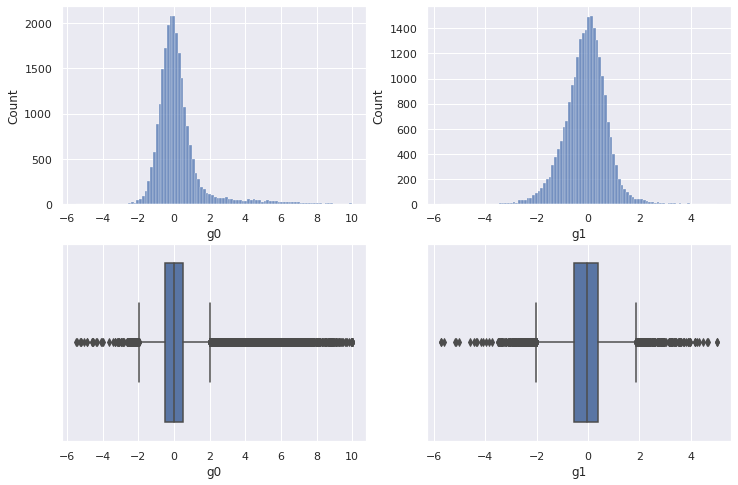

In [ ]:

figure(figsize=(12, 8))

fig = plt.subplot(2, 2, 1)
sns.histplot(data = df['g0'], bins = 100, stat = 'count')

plt.subplot(2, 2, 3)
sns.boxplot(x = 'g0', data = df)

plt.subplot(2, 2, 2)
sns.histplot(data = df['g1'], bins = 100, stat = 'count')

plt.subplot(2, 2, 4)
sns.boxplot(x = 'g1', data = df)


Aprofundando ainda mais a análise, vamos estudar os boxplot dos genes g0 e g1 comparados com os tipos de tratamento

Text(0.5, 1.0, 'Boxplot do gene g1 comparado com o tipo de tratamento')

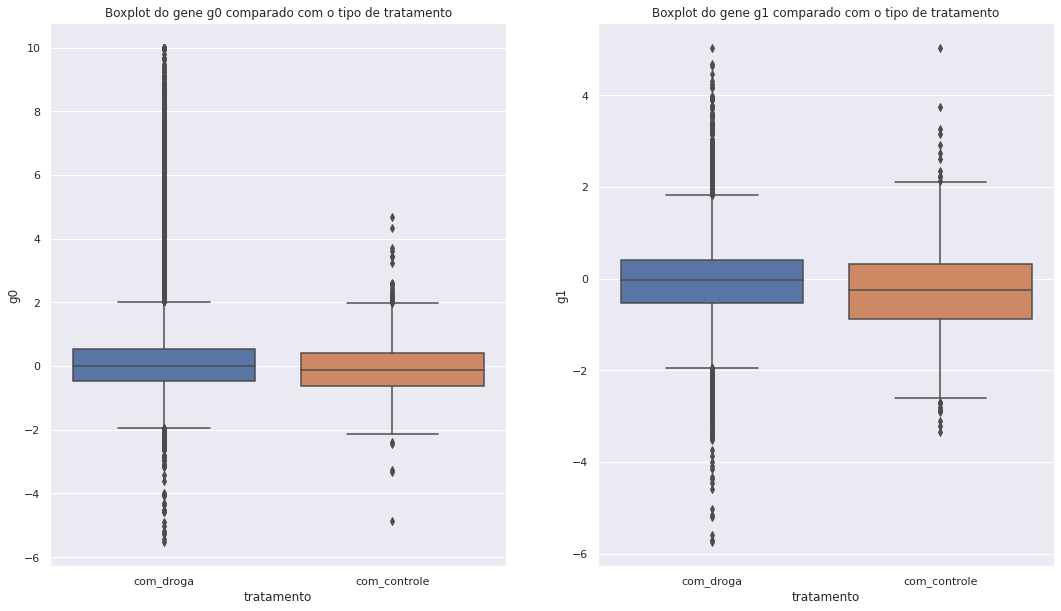

In [ ]:
figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'tratamento', y = 'g0', data = df)
plt.title('Boxplot do gene g0 comparado com o tipo de tratamento')


plt.subplot(1, 2, 2)
sns.boxplot(x = 'tratamento', y = 'g1', data = df)
plt.title('Boxplot do gene g1 comparado com o tipo de tratamento')


Observamos que ambas as variáveis possuem muitos outliers, ou seja, valores muito distantes da mediana. Porém, esses outliers se concentram quando consideramos a categoria 'com_droga'. Isso levanta o questionamento: quais desses compostos estão produzindo mais outliers?
Inicialmente, vejamos como cada um dos 8 compostos mais frequentes afetam o boxplot de g0.

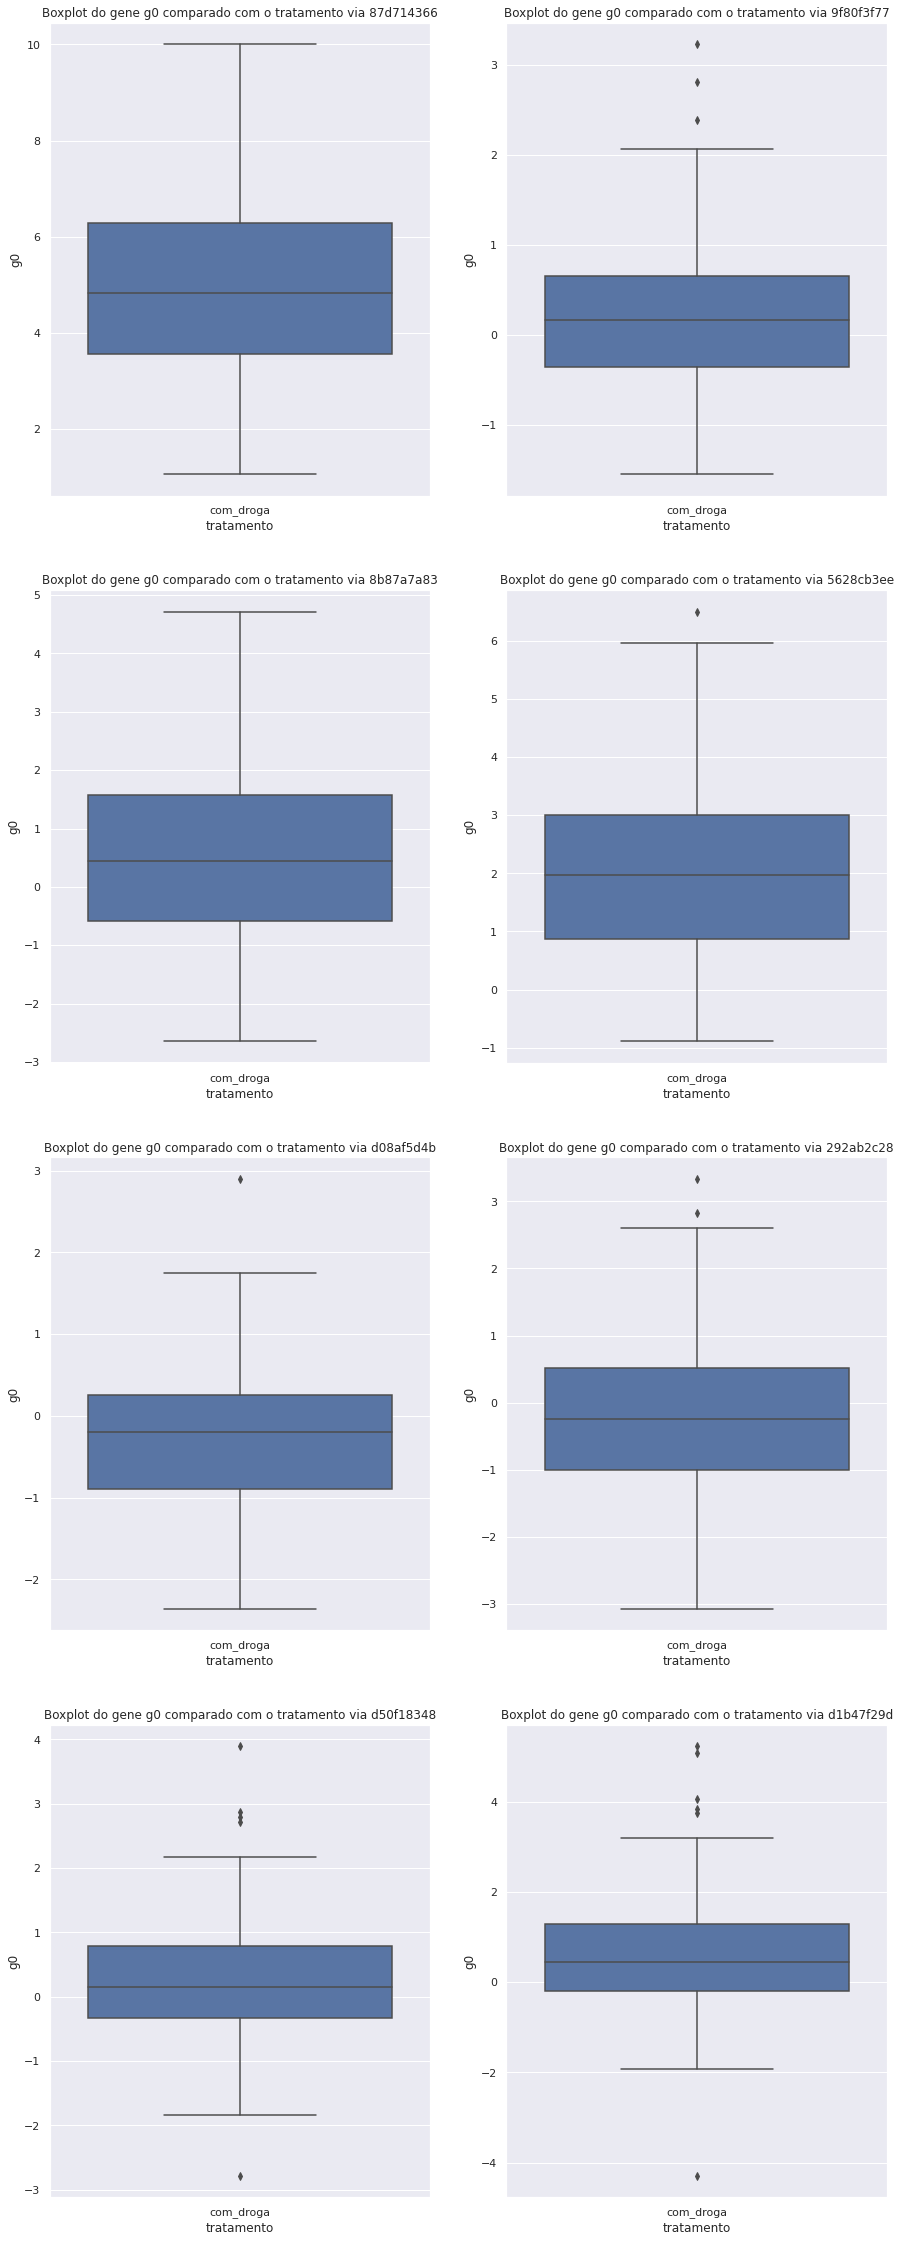

In [ ]:
figure(figsize=(15, 40))


plt.subplot(4, 2, 1)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == '87d714366'])
plt.title('Boxplot do gene g0 comparado com o tratamento via 87d714366')


plt.subplot(4, 2, 2)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == '9f80f3f77'])
plt.title('Boxplot do gene g0 comparado com o tratamento via 9f80f3f77')

plt.subplot(4, 2, 3)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == '8b87a7a83'])
plt.title('Boxplot do gene g0 comparado com o tratamento via 8b87a7a83')

plt.subplot(4, 2, 4)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == '5628cb3ee'])
plt.title('Boxplot do gene g0 comparado com o tratamento via 5628cb3ee')

plt.subplot(4, 2, 5)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == 'd08af5d4b'])
plt.title('Boxplot do gene g0 comparado com o tratamento via d08af5d4b')

plt.subplot(4, 2, 6)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == '292ab2c28'])
plt.title('Boxplot do gene g0 comparado com o tratamento via 292ab2c28')

plt.subplot(4, 2, 7)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == 'd50f18348'])
plt.title('Boxplot do gene g0 comparado com o tratamento via d50f18348')

plt.subplot(4, 2, 8)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == 'd1b47f29d'])
plt.title('Boxplot do gene g0 comparado com o tratamento via d1b47f29d')

plt.show()

Observamos então que há poucos outliers vindo de tratamento com os 9 compostos mais frenquentes. Portanto, esses outliers devem vir de tratamento com compostos menos frequentes. Vejamos isso em outro bloxpot

Text(0.5, 1.0, 'gene g0 x tratamento com os compostos mais frequentes')

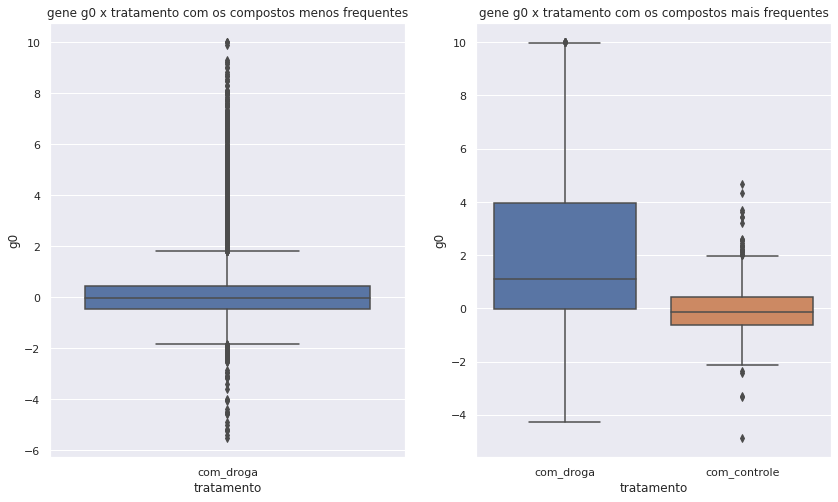

In [ ]:
figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.boxplot(x = 'tratamento', y = 'g0', data = df.query('composto not in @cod_composto'))
plt.title('gene g0 x tratamento com os compostos menos frequentes')

plt.subplot(1,2,2)
sns.boxplot(x = 'tratamento', y = 'g0', data = df.query('composto in @cod_composto'))
plt.title('gene g0 x tratamento com os compostos mais frequentes')


**Conclusão**: com respeito ao gene g0, as drogas mais frequentes apresentam poucos outliers, já as drogas menos frequentes apresentam uma grande quantidade de outliers. 

Text(0.5, 1.0, 'gene g1 x tratamento com os compostos mais frequentes')

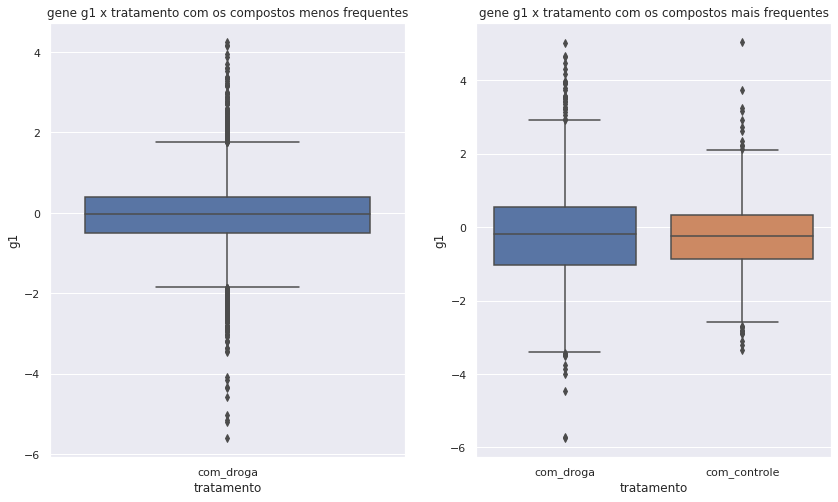

In [ ]:
figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.boxplot(x = 'tratamento', y = 'g1', data = df.query('composto not in @cod_composto'))
plt.title('gene g1 x tratamento com os compostos menos frequentes')

plt.subplot(1,2,2)
sns.boxplot(x = 'tratamento', y = 'g1', data = df.query('composto in @cod_composto'))
plt.title('gene g1 x tratamento com os compostos mais frequentes')


Observamos que algo semelhante não ocorre com o gene g1, por exemplo. 